First robot is at [0 0]
Second robot is at [9 0]
Third robot is at [9 9]


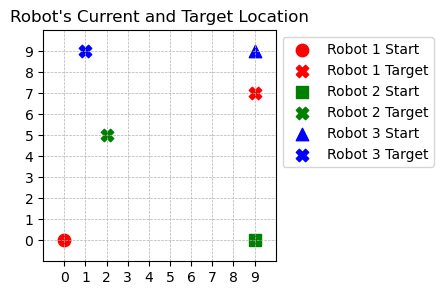

 max manhatten distance = 16


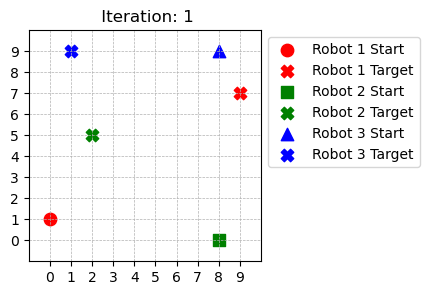

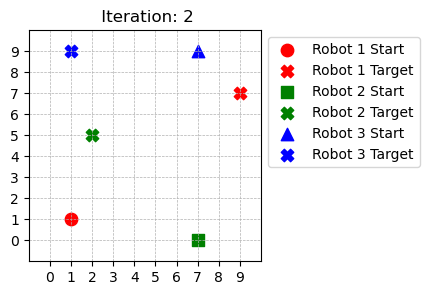

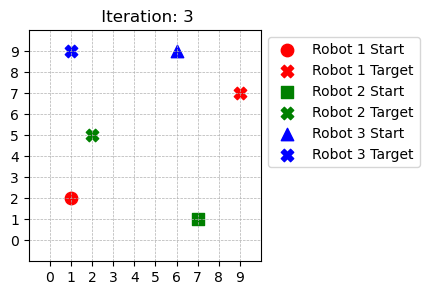

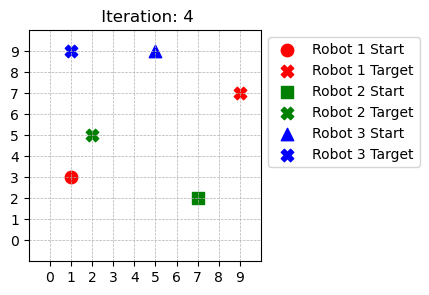

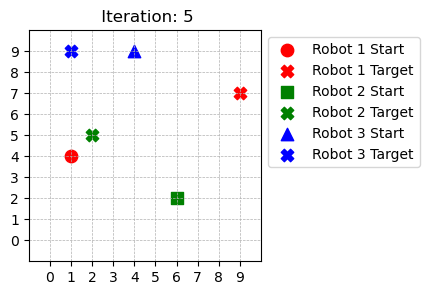

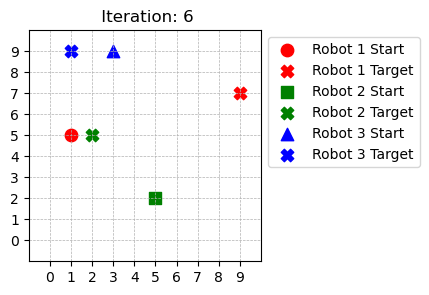

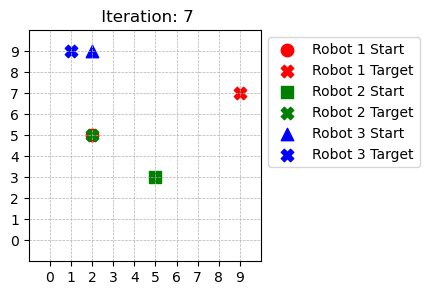

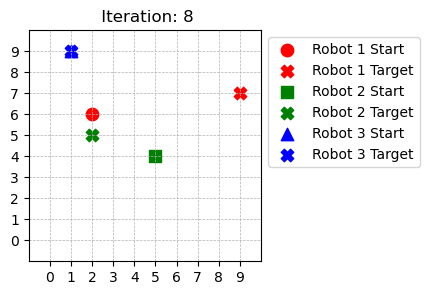

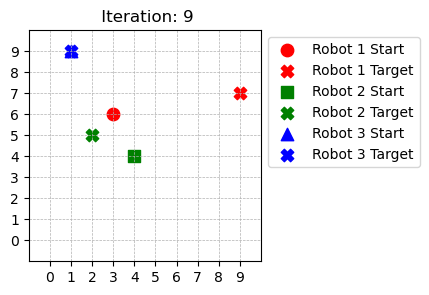

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance
import random
import time

# current and target positions of robots
current_positions = np.array([[0, 0], [9, 0], [9, 9]])
target_positions = np.array([[9, 7], [2, 5], [1, 9]])

print(f"First robot is at {current_positions[0]}")
print(f"Second robot is at {current_positions[1]}")
print(f"Third robot is at {current_positions[2]}")

# Grid size (Assuming a 10x10 grid)
grid_size = (10, 10)
# Create a figure for plotting
plt.figure(figsize=(3, 3))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(grid_size[0]))
plt.yticks(range(grid_size[1]))
# Set the axis limits to match the grid size
plt.xlim(-1, grid_size[0])  # X-axis limits
plt.ylim(-1, grid_size[1])  # Y-axis limits
# Colors and markers for robots
colors = ['r', 'g', 'b']
markers = ['o', 's', '^']
# Plot initial and target positions
for i in range(len(current_positions)):
    plt.scatter(*current_positions[i], color=colors[i], 
                marker=markers[i], label=f'Robot {i+1} Start', s=80)
    plt.scatter(*target_positions[i], color=colors[i], 
                marker='X', label=f'Robot {i+1} Target', s=80)
# Move legend outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Robot's Current and Target Location")
plt.show()

dist = []
# Calculate distances between current and target positions
for i in range(len(current_positions)):
    dist.append(scipy.spatial.distance.cityblock(target_positions[i], current_positions[i]))
print(f" max manhatten distance = {max(dist)}")

# Function to move robot towards target
def move_robot(current_pos, target_pos, current_robot_positions):
    new_pos = current_pos.copy() # copy
    possible_moves = []    
    if new_pos[0] < target_pos[0]:
        possible_moves.append((new_pos[0] + 1, new_pos[1]))  # Move right
    elif new_pos[0] > target_pos[0]:
        possible_moves.append((new_pos[0] - 1, new_pos[1]))  # Move left    
    if new_pos[1] < target_pos[1]:
        possible_moves.append((new_pos[0], new_pos[1] + 1))  # Move up
    elif new_pos[1] > target_pos[1]:
        possible_moves.append((new_pos[0], new_pos[1] - 1))  # Move down
    
    if possible_moves:
        # returns a randomly selected element from the specified sequence
        new_pos = np.array(random.choice(possible_moves))
        time.sleep(0.2)    
    # Check for collisions
    for pos in current_robot_positions:
        if np.array_equal(new_pos, pos):
            return current_pos  # Stay in place if collision detected    
    return new_pos
    

# Simulation loop
no_of_robots = len(current_positions)
no_of_iterations = max(dist) # the number of iteration can be linked to max manhatten distance 

for j in range(no_of_iterations):
    new_positions = current_positions.copy()
    for r in range(no_of_robots):
        updated_position = move_robot(current_positions[r], target_positions[r], new_positions)  
        new_positions[r] = updated_position  # Update position if no collision occurred
    
    current_positions = new_positions.copy()
    
    # Plot updated positions
    plt.figure(figsize=(3, 3))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(range(grid_size[0]))
    plt.yticks(range(grid_size[1]))
    # Set the axis limits to match the grid size
    plt.xlim(-1, grid_size[0])  # X-axis limits
    plt.ylim(-1, grid_size[1])  # Y-axis limits
    for i in range(no_of_robots):
        plt.scatter(*current_positions[i], color=colors[i], marker=markers[i], label=f'Robot {i+1} Start', s=80)
        plt.scatter(*target_positions[i], color=colors[i], marker='X', label=f'Robot {i+1} Target', s=80)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f" Iteration: {j+1}")
    plt.show()